## In this notebook, we will use ML algorithms to model a multi label dataset using ***skmultilearn*** library

### The dataset has a title column where various queries are given. It has three labels, python, sql, php. 

## Solution for Multi-Label Problem:
### Methods for solving Multi-label Classification Problems
* Problem Transformation
* Adapted Algorithm
* Ensemble approaches

#### Problem Transformation:

* It refers to transforming the multi-label problem into single-label problem(s) by using
** Binary Relevance: treats each label as a separate single class classification
** Classifier Chains:In this, the first classifier is trained just on the input data and then each next classifier is trained on the input space and all the previous classifiers in the chain.
* * Label Powerset:we transform the problem into a multi-class problem with one multi-class classifier is trained on all unique label combinations found in the training data.

#### Adapted Algorithm:
* adapting the algorithm to directly perform multi-label classification, rather than transforming the problem into different subsets of problems.

In [ ]:
!ls

sample_data  so_dataset_2_tags.csv


In [ ]:
!pip install scikit-multilearn

     |████████████████████████████████| 89 kB 3.5 MB/s 


In [ ]:
!pip install nltk

In [ ]:
# EDA Libraries
import pandas as pd
import numpy as np

# Ploting libraries
import seaborn as sns
import matplotlib.pyplot as plt

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, hamming_loss
from skmultilearn.problem_transform import BinaryRelevance, ClassifierChain, LabelPowerset

# Text Preprocessing Libraries
import re
import nltk
nltk.download()
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger is already up-to-date!
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger_ru is already up-to-
       |       date!
       | Downloading package basque_grammars to /root/nltk_data...
       |   Package basque_grammars is already up-to-date!


True

In [ ]:
df = pd.read_csv('so_dataset_2_tags.csv')
df.head()

,title,tags,mysql,python,php
0,Flask-SQLAlchemy - When are the tables/databas...,"['python', 'mysql']",1,1,0
1,Combining two PHP variables for MySQL query,"['php', 'mysql']",1,0,1
2,'Counting' the number of records that match a ...,"['php', 'mysql']",1,0,1
3,Insert new row in a table and auto id number. ...,"['php', 'mysql']",1,0,1
4,Create Multiple MySQL tables using PHP,"['php', 'mysql']",1,0,1


In [ ]:
df.shape

(144, 5)

In [ ]:
df.isnull().sum()

title     0
tags      0
mysql     0
python    0
php       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   144 non-null    object
 1   tags    144 non-null    object
 2   mysql   144 non-null    int64 
 3   python  144 non-null    int64 
 4   php     144 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 5.8+ KB


In [ ]:
df['python'].value_counts()

0    82
1    62
Name: python, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


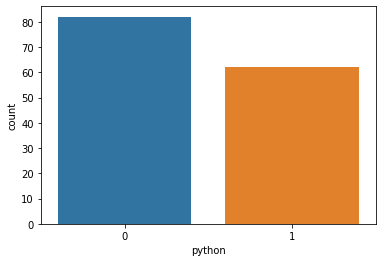

In [ ]:
sns.countplot(df['python'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


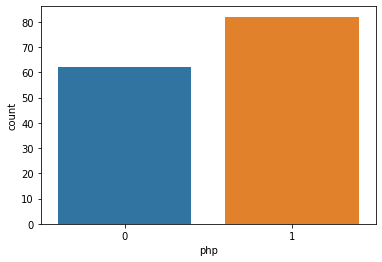

In [ ]:
sns.countplot(df['php'])

# Data Preprocessing

In [ ]:
df['title']

0      Flask-SQLAlchemy - When are the tables/databas...
1            Combining two PHP variables for MySQL query
2      'Counting' the number of records that match a ...
3      Insert new row in a table and auto id number. ...
4                 Create Multiple MySQL tables using PHP
                             ...                        
139    Executing "SELECT ... WHERE ... IN ..." using ...
140                           SQLAlchemy reconnect to db
141        mysql Count Distinct and get result using php
142    How to store the result of a radio button with...
143           Use SQL count result in IF statement - PHP
Name: title, Length: 144, dtype: object

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

# df['title'] = df['title'].apply(lambda x:re.sub('-', ' ', x))
# df['title'] = df['title'].apply(lambda x:re.sub('/', ' ', x))

In [ ]:
stop_words = set(stopwords.words('english'))
stop_words

In [ ]:
stop_words = set(stopwords.words('english'))
text = df['title'][0]
text = re.sub('-',' ', text)
word_tokens = word_tokenize(text)
corpus = [word for word in word_tokens if not word in stop_words]
sentence = ' '.join(corpus)

In [ ]:
word_tokens

['Flask',
 'SQLAlchemy',
 'When',
 'are',
 'the',
 'tables',
 'databases',
 'created',
 'and',
 'destroyed',
 '?']

In [ ]:
sentence

'Flask SQLAlchemy When tables databases created destroyed ?'

In [ ]:
stop_words = set(stopwords.words('english'))      # using set so that there is no repeated words

def clean_text(text):

  """
  text preprocessing, removing punctuation and stopwords
  input:: input text: str
  output:: input text without stop words and some punctuation

  """
  text = re.sub('-', ' ', text)
  text = re.sub('/', ' ', text)
  #text = re.sub('?', ' ', text)
  word_tokens = word_tokenize(text)
  corpus = [word for word in word_tokens if not word in stop_words]
  sentence = ' '.join(corpus)

  return sentence

df['title'] = df['title'].apply(lambda x:clean_text(x))
df['title']

0      Flask SQLAlchemy When tables databases created...
1                Combining two PHP variables MySQL query
2      'Counting ' number records match certain crite...
3        Insert new row table auto id number . Php MySQL
4                 Create Multiple MySQL tables using PHP
                             ...                        
139    Executing `` SELECT ... WHERE ... IN ... '' us...
140                              SQLAlchemy reconnect db
141            mysql Count Distinct get result using php
142    How store result radio button database value ,...
143                Use SQL count result IF statement PHP
Name: title, Length: 144, dtype: object

In [ ]:
# Vectoriing the text
tfidf = TfidfVectorizer()
X_features = tfidf.fit_transform(df['title']).toarray()

In [ ]:
X_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_features.shape

(144, 437)

In [ ]:
# Labels
y = df[['mysql', 'python', 'php']]

In [ ]:
# Splitting data into train-test set
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=14)

## Creating Models

In [ ]:
def build_model(multiModel, mlModel, X_train, X_test, y_train, y_test):

  """
  input: Multi-Label Classifier, ML model, X_train, X_test, y_train, y_test
  output: tuple(accuracy_score, hamming_loss)
  """

  mlModel = mlModel()
  clf_multi = multiModel(mlModel)
  clf_multi.fit(X_train, y_train)
  pred = clf_multi.predict(X_test).toarray()
  acc = accuracy_score(y_test, pred)
  ham_loss = hamming_loss(y_test, pred)

  return (acc, ham_loss)

### Binary Relavence:

In [ ]:
clf_binary_rel = BinaryRelevance(MultinomialNB())

In [ ]:
clf_binary_rel.fit(X_train, y_train)

BinaryRelevance(classifier=MultinomialNB(), require_dense=[True, True])

In [ ]:
pred_bin = clf_binary_rel.predict(X_test).toarray()

In [ ]:
accuracy_score(y_test, pred_bin)

0.896551724137931

In [ ]:
hamming_loss(y_test, pred_bin)

0.06896551724137931

In [ ]:
binary_rel_score = build_model(BinaryRelevance, MultinomialNB,
                               X_train, X_test, y_train, y_test)
binary_rel_score

(0.896551724137931, 0.06896551724137931)

### Classifier Chain

In [ ]:
clf_chain_score = build_model(ClassifierChain, MultinomialNB,
                              X_train, X_test, y_train, y_test)
clf_chain_score

(0.9310344827586207, 0.04597701149425287)

### Label Powerset

In [ ]:
clf_Lpower_score = build_model(LabelPowerset, MultinomialNB,
                              X_train, X_test, y_train, y_test)
clf_Lpower_score

(0.896551724137931, 0.06896551724137931)

### Testing on a sample

In [ ]:
ex1 = df['title'].iloc[0]

In [ ]:
ex1

'Flask SQLAlchemy When tables databases created destroyed ?'

In [ ]:
ex1v = tfidf.transform([ex1])

In [ ]:
clf_binary_rel.predict(ex1v).toarray()

array([[1, 1, 0]], dtype=int64)

In [ ]:
y.loc[0]

mysql     1
python    1
php       0
Name: 0, dtype: int64

#### Example 2

In [ ]:
ex2 = df['title'].iloc[3]

In [ ]:
ex2

'Insert new row table auto id number . Php MySQL'

In [ ]:
ex2v = tfidf.transform([ex2])

In [ ]:
clf_binary_rel.predict(ex2v).toarray()

array([[1, 0, 1]], dtype=int64)

In [ ]:
y.loc[3]

mysql     1
python    0
php       1
Name: 3, dtype: int64

## Using SVC ML model

In [ ]:
import scipy
y_train_sparse = scipy.sparse.csr_matrix(y_train.values)
X_train_sparse = scipy.sparse.csr_matrix(X_train)
#y_train_sparse.toarray()

In [ ]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC

# initialize Binary Relevance multi-label classifier
# with an SVM classifier
# SVM in scikit only supports the X matrix in sparse representation

classifier = BinaryRelevance(
    classifier = SVC(),
    require_dense = [False, True]
)

# train
classifier.fit(X_train_sparse, y_train_sparse)

# predict
predictions = classifier.predict(X_test)